In [4]:
def calculateIncome(base_salary, rate, years):
    salary = 0
    for year in range(1, years+1):
        if year == 1:
            salary = base_salary
        else:
            salary += round(salary * rate)
        print(f"Year {year}: ${salary}")

In [5]:
calculateIncome(115000, 0.03, 10)

Year 1: $115000
Year 2: $118450
Year 3: $122004
Year 4: $125664
Year 5: $129434
Year 6: $133317
Year 7: $137317
Year 8: $141437
Year 9: $145680
Year 10: $150050


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

Text(0, 0.5, 'Water Drinks (Litre)')

X = [ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]
Y = [1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ]
Predicted Y Values are = [2.6099999999999994, 3.38, 4.1499999999999995, 4.997, 5.150999999999999, 3.2175999999999996, 7.1453, 4.6274, 5.6129999999999995, 1.8168999999999997, 5.229399999999999, 7.8537, 4.0191, 5.897899999999999, 4.2578, 6.788999999999999, 2.4699999999999998]


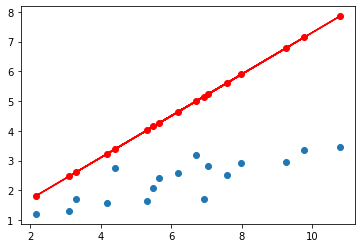

In [9]:
predicted_y_values = list(map(lambda x: 0.7*x + 0.3, X))
print(f"X = {X}")
print(f"Y = {Y}")
print(f"Predicted Y Values are = {predicted_y_values}")
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, 'ro-') #3) 30mins - plotted in red color

In [11]:
error = [(i-j) for i, j in zip(Y, predicted_y_values)] 
print(f"Y = {Y}")
print(f"Predicted Y = {predicted_y_values}")
print(f"Error = {error}")
np.var(error, ddof=1)

Y = [1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ]
Predicted Y = [2.6099999999999994, 3.38, 4.1499999999999995, 4.997, 5.150999999999999, 3.2175999999999996, 7.1453, 4.6274, 5.6129999999999995, 1.8168999999999997, 5.229399999999999, 7.8537, 4.0191, 5.897899999999999, 4.2578, 6.788999999999999, 2.4699999999999998]
Error = [-0.9099999999999995, -0.6200000000000001, -2.0599999999999996, -1.807, -3.456999999999999, -1.6445999999999996, -3.7792999999999997, -2.0313999999999997, -3.0829999999999997, -0.5958999999999997, -2.402399999999999, -4.3887, -2.3691, -2.993899999999999, -1.8377999999999997, -3.848999999999999, -1.1699999999999997]


1.3343514911764705

In [14]:
#MSE
sum([i**2 for i in error])/len(error) #42min

0.15385767404191164

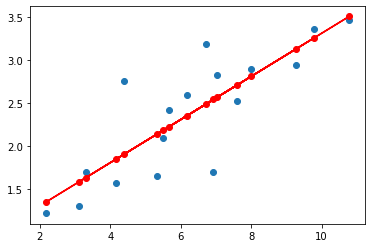

In [11]:
predicted_y_values = list(map(lambda x: 0.25163494*x + 0.79880123, X)) #(Day3 37m) IMPORTANT to learn this line
plt.scatter(X,Y)
plt.plot(X, predicted_y_values, 'ro-') #red line

In [16]:
error = [(i-j) for i, j in zip(Y, predicted_y_values)]
np.var(error, ddof=1)

0.16347377866953056

In [21]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# for i in data {
#     count = len(data)
#     print()
# }

def percentile(data, percent):
    #first we want to sort the data in ascending order
    data = np.sort(data)
    #then we will get the index
    
    index = (percent/100)* len(data)
    
    #we will have to round up to the nearest whole number using the ceiling method and covert to an int
    index = int(np.ceil(index))
    
    return data[index-1] #adjust by -1 since indices start with 0
    
print(percentile(data, 80))
#check your work by comparing to numpy.percentile()
print(int(np.percentile(data, 44)))

7
3


# Day 4

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


#df = pd.read_csv(titanic.csv)

# Running Distance in Mile
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

def pearson_corr(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = sum([(i - x_mean)*(i - y_mean) for i,j in zip(x,y)])
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num) / np.sqrt(np.sum(den_1)) / np.sqrt(np.sum(den_2))
    return correlation_x_y

#print(pearson_corr(df['Fare'], df['Siblings/Spouses Aboard']))
#print(scipy.stats.pearsonr(df['Fare'], df['Siblings/Spouses Aboard']))


print(pearson_corr(X,Y))
print(scipy.stats.pearsonr(X,Y))
    

3.3079338613299516
(0.8323917528894437, 3.391952640710603e-05)
